In [1]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
e  = np.e

Synthesis function of Fourier series of a periodic function can be written as:  
\begin{equation*}
\Large
    x(t)   =\sum_{k=-\infty}^\infty a_k e^{jkw_{0}t} 
\end{equation*}

Analysis function enables us to calculate fourier coefficients $a_{k}$ and written as:
\begin{equation*}
\Large
    a_k   =\frac{1}{T_0}\int_{T_0} x(t) e^{-jkw_{0}t} dt
\end{equation*}

check out Alan V. Oppenheim's lectures for details.


In [2]:
def synthesis_func(ak_real_list, ak_imag_list, k_list, t):
    
    if len(ak_real_list) != len(ak_imag_list) or len(ak_real_list) != len(k_list):
        print('Check the coefficient lists')
        return None
    
    period        = np.abs(t[0] - t[-1])
    omg_0         = 2*pi / period
    
    summ = 0
    for c,k in enumerate(k_list):
        summ += (ak_real_list[c] + 1j * ak_imag_list[c]) * e**(1j * k *omg_0 * t)
    
    return summ

In [3]:
def analysis_func(t,x, k_list = np.arange(-5,5)):
    period        = np.abs(t[0] - t[-1])
    omg_0         = 2*pi / period
    
    a_k_real_list = np.zeros(len(k_list))
    a_k_imag_list = np.zeros(len(k_list))
    
    for c,k in enumerate(k_list):
        integrate = x*e**(-1j * omg_0 * k * t )
        a_k_real = 1/ period * np.trapz(integrate.real, x= t)
        a_k_imag = 1/ period * np.trapz(integrate.imag, x= t)
        a_k_real_list[c] = a_k_real
        a_k_imag_list[c] = a_k_imag

    return (a_k_real_list,a_k_imag_list)

In [4]:
C_0 = 4* np.log(2)
C_1 = 4

def Gaussian(x,theta_k,H_k):
    return np.sqrt(C_0)/(H_k * np.sqrt(pi)) * np.exp(-C_0*((x -  theta_k) / H_k)**2)

def Lorentzian(x,theta_k,H_k):
    return np.sqrt(C_1)/(H_k * pi) / (1 + C_1 * ((x - theta_k)/ H_k)**2)

def pseudo_voigt(x,theta_k,H_k,mu,amp):
    return (mu * Lorentzian(x,theta_k,H_k) + (1- mu) * Gaussian(x,theta_k,H_k))*amp


## Lets first create a function(slice of it since it is periodic) and observe it between 0 and T_0(period)

In [18]:
T_0 = 20
N   = 1501

#t = np.linspace(0,T_0, N)
t = np.linspace(-T_0/2,T_0/2, N)

x = pseudo_voigt(t,0,0.2,0,1) 
x = 1*np.cos(1*2*pi/T_0*t) + 2*np.cos(2*2*pi/T_0*t) + 3*np.cos(3*2*pi/T_0*t)

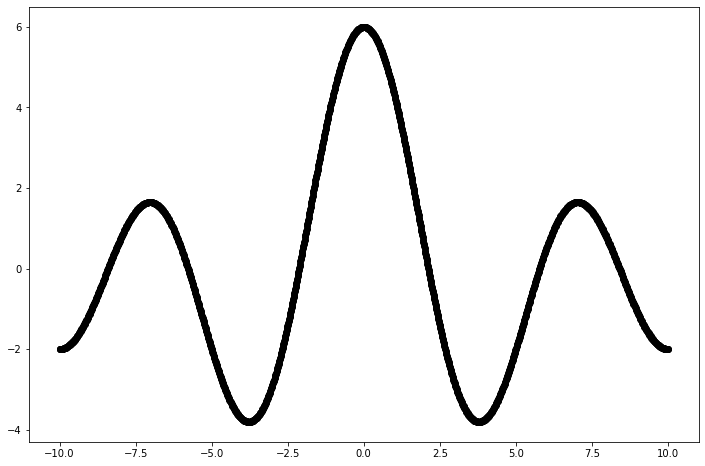

In [19]:
plt.figure(figsize= (12,8))
plt.scatter(t, x, color ='k', label = 'Signal')

In [20]:
k_list = np.arange(-60,61)
coeffs = analysis_func(t, x, k_list = k_list)

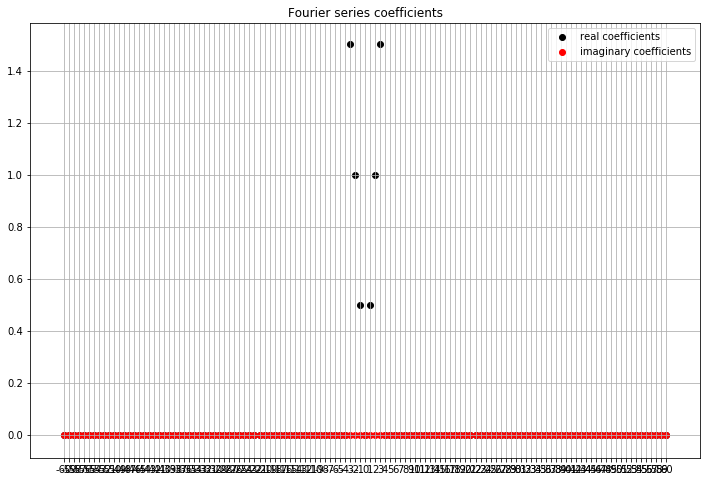

In [21]:
plt.figure(figsize= (12,8))
plt.title('Fourier series coefficients')
plt.scatter(k_list, coeffs[0], color ='k', label = 'real coefficients')
plt.scatter(k_list, coeffs[1], color ='r', label = 'imaginary coefficients')
plt.xticks(k_list, k_list)
plt.legend()
plt.grid()

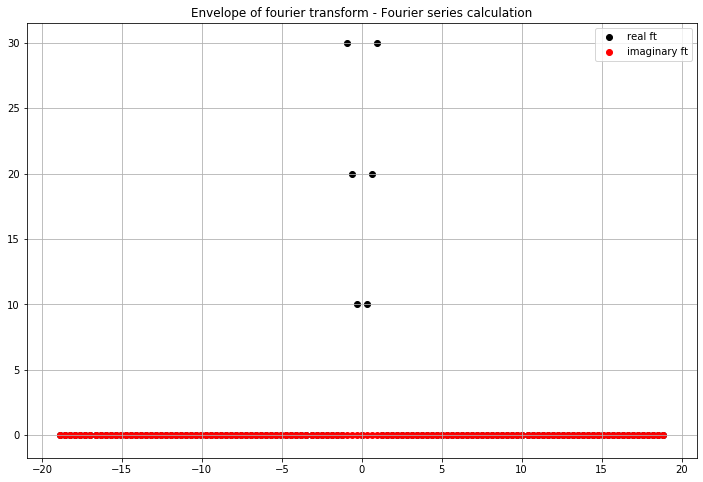

In [22]:
# play with T_0 and observe how envelope changes. If you increase the T0 while keeping gaussian the same for example, there should be no change in the envelope since it already assumes
# T0 as infinity.
# But fourier series coefficents should change (at k=1 for instance).

w      = k_list * 2*pi/T_0
X_real = coeffs[0]*T_0
X_imag = coeffs[1]*T_0

plt.figure(figsize= (12,8))
plt.title('Envelope of fourier transform - Fourier series calculation')
plt.scatter(w, X_real, color ='k', label = 'real ft')
plt.scatter(w, X_imag, color ='r', label = 'imaginary ft')
plt.legend()
plt.grid()


In [23]:
# Now lets get the original function back
func = synthesis_func(coeffs[0], coeffs[1], k_list, t)

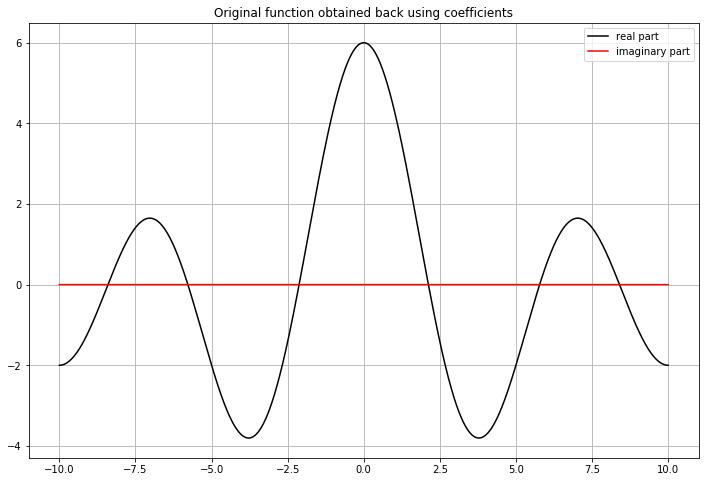

In [24]:
plt.figure(figsize= (12,8))
plt.title('Original function obtained back using coefficients')
plt.plot(t, func.real, color ='k', label = 'real part')
plt.plot(t, func.imag, color ='r', label = 'imaginary part')
plt.legend()
plt.grid()

We have calculated series coefficients first and then fourier transform envelope using series coefficients. Now lets write synthesis and analysis function for Fourier transformation instead of series and try to calculate envelope directly.

Synthesis function of Fourier transform can be written as:  
\begin{equation*}
\Large
    x(t)   =\frac{1}{2\pi} \int_{w=-\infty}^\infty X(w) e^{jwt} dw
\end{equation*}

Analysis function enables us to get the envelope and written as:
\begin{equation*}
\Large
    X(w)   =\int_{t=-\infty}^\infty x(t) e^{-jwt} dt
\end{equation*}

check out Alan V. Oppenheim's lectures for details.


In [25]:
def synthesis_transform_func(w,X,t):
    # X is complex series
    x_real = np.zeros(len(t))
    x_imag = np.zeros(len(t))
    for c,tt in enumerate(t):
        x_real[c] = 1/2/pi * np.trapz((X * e **(1j*w*tt)).real, x = w)
        x_imag[c] = 1/2/pi * np.trapz((X * e **(1j*w*tt)).imag, x = w)
    
    return x_real,x_imag    

In [26]:
def analysis_transform_func(w,x,t):
    # x is complex series
    X_real = np.zeros(len(w))
    X_imag = np.zeros(len(w))
    for c,ww in enumerate(w):
        X_real[c] =  np.trapz((x * e **(-1j*ww*t)).real, x = t)
        X_imag[c] =  np.trapz((x * e **(-1j*ww*t)).imag, x = t)
    
    return X_real,X_imag    

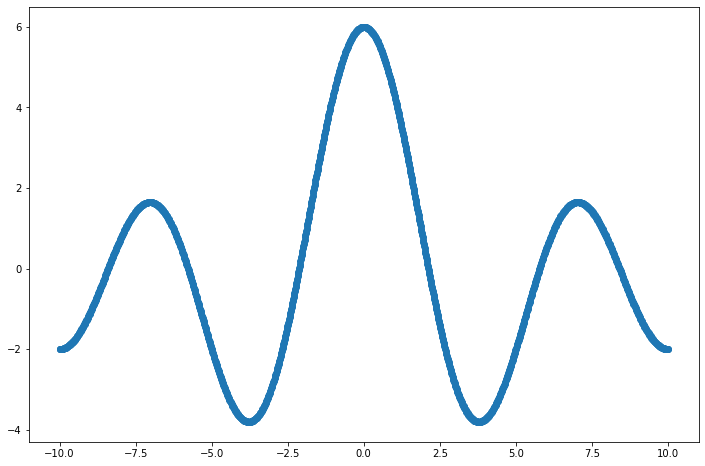

In [27]:
# We already have x and t series
plt.figure(figsize = (12,8))
plt.scatter(t,x)

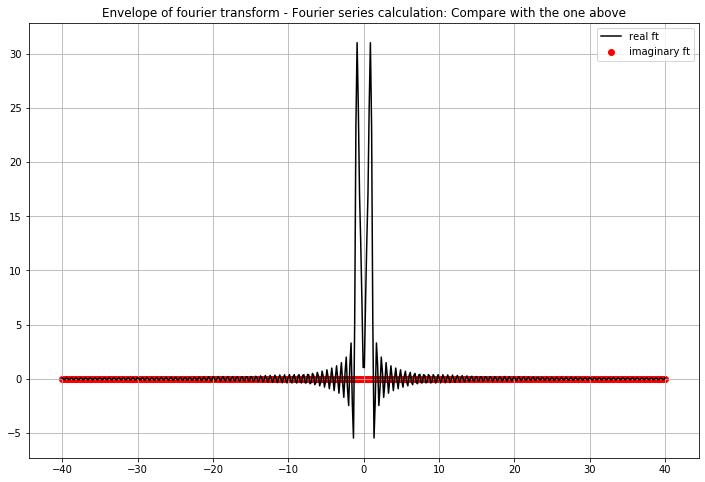

In [28]:
# Lets define a w range and calculate the fourier Transformation
w_list = np.linspace(-40,40,num=500)

X_real, X_imag = analysis_transform_func(w_list, x, t)

plt.figure(figsize= (12,8))
plt.title('Envelope of fourier transform - Fourier series calculation: Compare with the one above')
plt.plot(w_list, X_real, color ='k', label = 'real ft')
plt.scatter(w_list, X_imag, color ='r', label = 'imaginary ft')
plt.legend()
plt.grid()


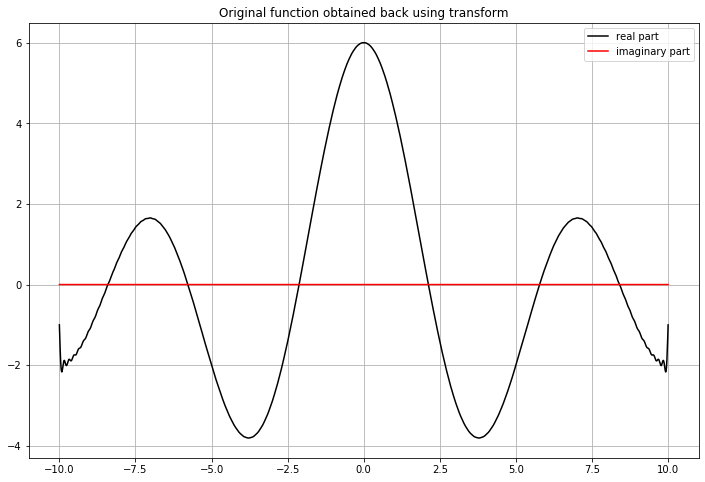

In [29]:
# Lets get the function back:
X = [a + b*1j for a,b in zip(X_real, X_imag)]
x_real, x_imag = synthesis_transform_func(w_list,X,t)

plt.figure(figsize= (12,8))
plt.title('Original function obtained back using transform')
plt.plot(t, x_real, color ='k', label = 'real part')
plt.plot(t, x_imag, color ='r', label = 'imaginary part')
plt.legend()
plt.grid()


## We have some knowledge about continuous time fourier transform. Now lets use fft and compare the results

(-40, 40)

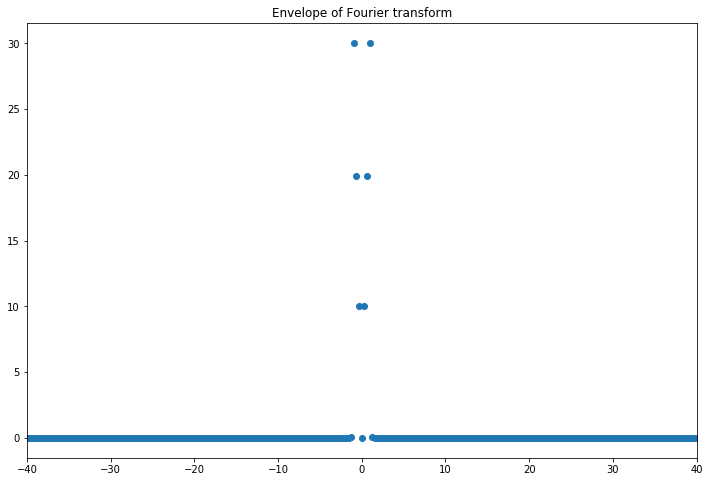

In [30]:
from numpy.fft import fft, ifft, fftfreq

X = fft(x) * np.abs(t[0]-t[1]) 
# Why do we do multiply with np.abs(t[0]-t[1])? refer to the link: 
#https://stackoverflow.com/questions/19975030/amplitude-of-numpys-fft-results-is-to-be-multiplied-by-sampling-period

w_fft = fftfreq(len(x), d = np.abs(t[0]-t[1]))
w_fft = w_fft * 2* pi

plt.figure(figsize= (12,8)) 
plt.title('Envelope of Fourier transform')
plt.scatter(w_fft, np.abs(X))
plt.xlim([-40,40])